In [1]:
pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
data = [
    [0.5, 0.7, 'orange'],
    [1.0, 1.2, 'orange'],
    [1.2, 0.8, 'orange'],
    [3.0, 3.5, 'grapefruit'],
    [3.5, 4.0, 'grapefruit'],
    [4.5, 5.0, 'grapefruit'],
    [3.5, 3.0, 'unknown']  # Buah misterius
]

In [5]:
df = pd.DataFrame(data, columns=['x', 'y', 'label'])
print(df)

     x    y       label
0  0.5  0.7      orange
1  1.0  1.2      orange
2  1.2  0.8      orange
3  3.0  3.5  grapefruit
4  3.5  4.0  grapefruit
5  4.5  5.0  grapefruit
6  3.5  3.0     unknown


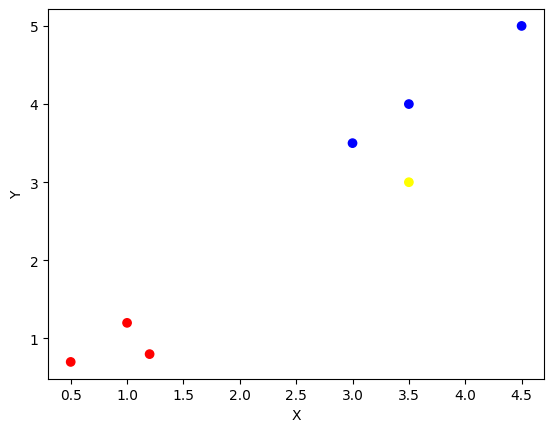

In [6]:
colors = {'orange':'red', 'grapefruit':'blue', 'unknown':'yellow'}
plt.scatter(df['x'], df['y'], c=df['label'].apply(lambda x: colors[x]))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

distances = []
unknown = df.iloc[-1][['x', 'y']].tolist()  # Titik buah misterius
for index, row in df.iterrows():
    if row['label'] != 'unknown':
        distance = euclidean_distance(unknown, row[['x', 'y']].tolist())
        distances.append((distance, row['label']))

# Print jarak yang dihitung
for distance in distances:
    print(f"Distance: {distance[0]}, Label: {distance[1]}")

Distance: 3.7802116342871597, Label: orange
Distance: 3.0805843601498726, Label: orange
Distance: 3.1827660925679098, Label: orange
Distance: 0.7071067811865476, Label: grapefruit
Distance: 1.0, Label: grapefruit
Distance: 2.23606797749979, Label: grapefruit


In [8]:
# Mengurutkan jarak dan memilih 3 tetangga terdekat
k = 3
sorted_distances = sorted(distances, key=lambda x: x[0])
nearest_neighbors = sorted_distances[:k]

# Menentukan label dari buah misterius berdasarkan tetangga terdekat
labels = [label for _, label in nearest_neighbors]
predicted_label = max(set(labels), key=labels.count)
print(f"The predicted label for the unknown fruit is: {predicted_label}")

The predicted label for the unknown fruit is: grapefruit


In [9]:
df['distance'] = [dist[0] if dist[1] != 'unknown' else None for dist in distances] + [None]
df.to_excel('knn_results.xlsx', index=False)